In [1]:
import os
import cv2
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load Sample Image

In [2]:
sample_img_1  = '../DataSet/Valid/DCM/700.dcm'
sample_mask_1 = '../DataSet/Valid/Label/700.png'
# 649
sample_img_2  = '../DataSet/Valid/DCM/698.dcm'
sample_mask_2 = '../DataSet/Valid/Label/698.png'

In [3]:
img_1 = sitk.ReadImage(sample_img_1)
img_arr_1 = sitk.GetArrayFromImage(img_1)[0]
mask_1 = cv2.imread(sample_mask_1, 0)

img_2 = sitk.ReadImage(sample_img_2)
img_arr_2 = sitk.GetArrayFromImage(img_2)[0]
mask_2 = cv2.imread(sample_mask_2, 0)

# Visualize Sample Image

In [83]:
def overlay_mask_on_img(img, mask):
    overlay_img = (img - img.min()) / (img.max() - img.min())
    overlay_img = (overlay_img * 255).astype(np.uint8)
    overlay_img = np.repeat(overlay_img[...,None], 3, -1)
    overlay_img[mask != 0] = [255,0,0]
    
    return overlay_img

In [84]:
overlay_img_1 = overlay_mask_on_img(img_arr_1, mask_1)
overlay_img_2 = overlay_mask_on_img(img_arr_2, mask_2)

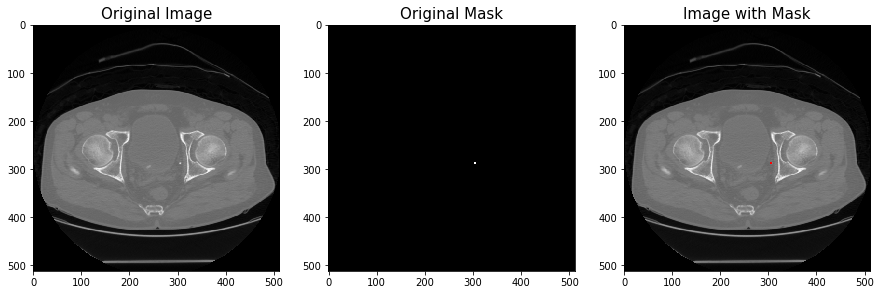

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_1, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(mask_1, 'gray')
axes[1].set_title("Original Mask", fontsize=15)

axes[2].imshow(overlay_img_1)
axes[2].set_title("Image with Mask", fontsize=15)

plt.show()

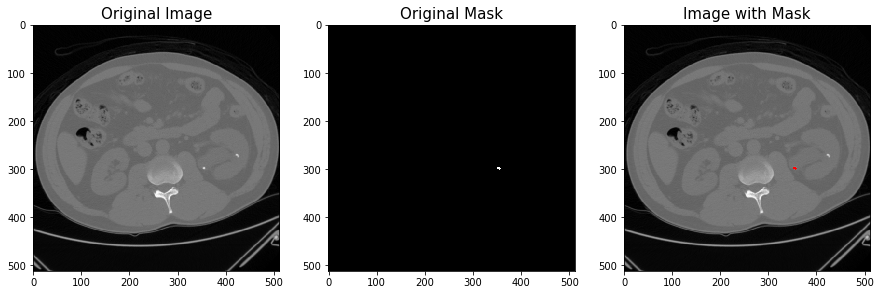

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(mask_2, 'gray')
axes[1].set_title("Original Mask", fontsize=15)

axes[2].imshow(overlay_img_2)
axes[2].set_title("Image with Mask", fontsize=15)

plt.show()

# HU Windowing

In [4]:
def image_windowing(img, w_min=0, w_max=200):
    img_w = img.copy()

    img_w[img_w < w_min] = w_min
    img_w[img_w > w_max] = w_max

    return img_w

In [5]:
img_w_1 = image_windowing(img_arr_1, -100, 300)
img_w_2 = image_windowing(img_arr_2, -100, 300)

In [6]:
def center_crop(img, width):
    y, x = img.shape
    x_center = x/2.0
    y_center = y/2.0
    x_min = int(x_center - width/2.0)
    x_max = x_min + width
    y_min = int(y_center - width/2.0)
    y_max = y_min + width
    img_cropped = img[y_min:y_max, x_min: x_max]
    return img_cropped

In [7]:
def image_minmax(img):
    img_minmax = ((img - np.min(img)) / (np.max(img) - np.min(img))).copy()
    img_minmax = (img_minmax * 255).astype(np.uint8)
        
    return img_minmax

In [31]:
img = center_crop(img_w_1, 300)
img = image_minmax(img)
img = cv2.resize(img, (224, 224))

In [32]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [33]:
img = img / 255.

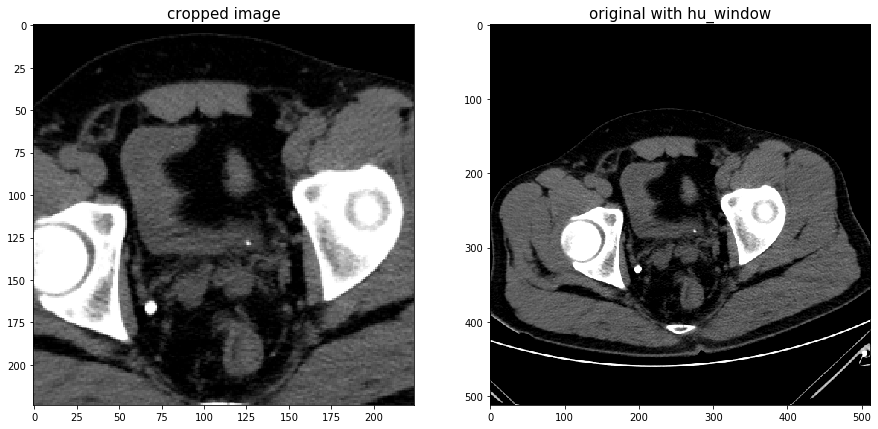

In [34]:
fig, axes = plt.subplots(1,2,figsize = (15,7))

axes[0].imshow(img, 'gray')
axes[0].set_title("cropped image", fontsize = 15)

axes[1].imshow(img_w_1, 'gray')
axes[1].set_title("original with hu_window", fontsize = 15)

plt.show()

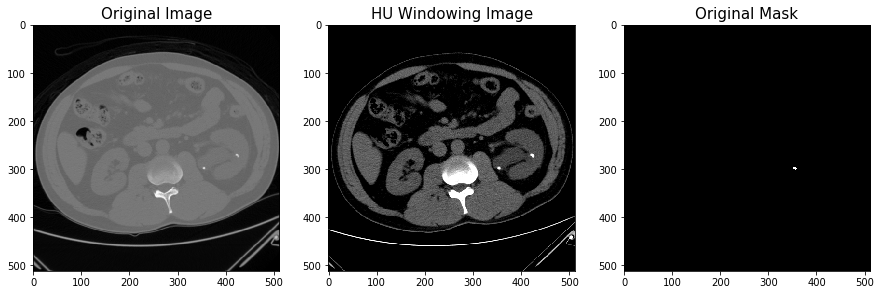

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_2, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_2, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()

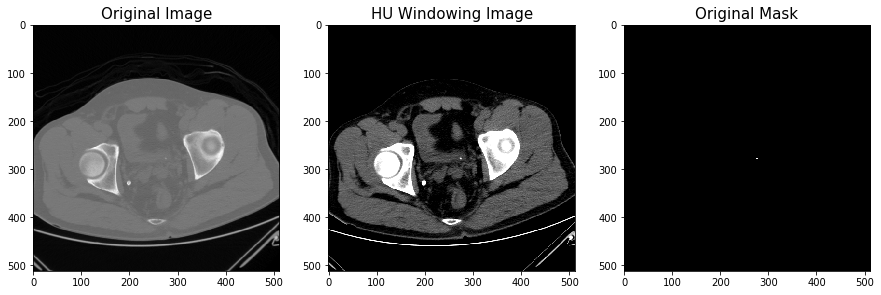

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_1, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_1, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_1, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()

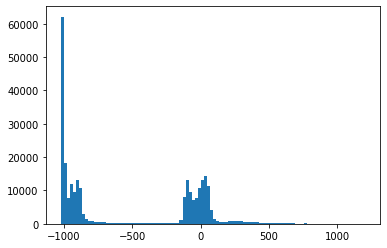

In [78]:
plt.hist(img_arr_1.reshape(-1), bins = 100)
plt.show()

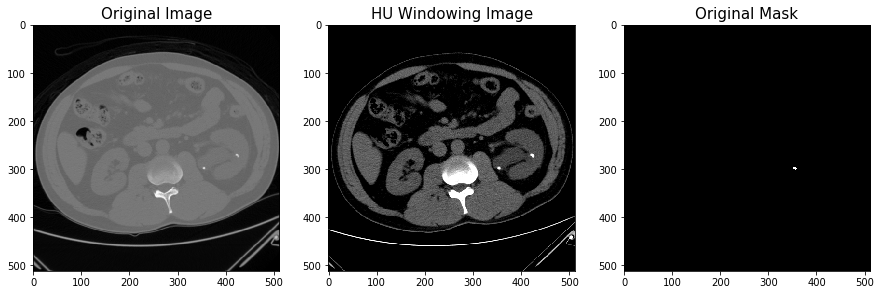

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_2, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_2, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()